# Librerias y Funciones

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as ss
from sklearn import preprocessing, svm
import statsmodels.tsa.api as smt
import statsmodels.api as sm


In [ ]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [ ]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

In [ ]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

In [ ]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

# 1.ETL

In [3]:
df = pd.read_excel('dataset.xlsx')

In [4]:
print(f'Las columnas a trabajar son: {df.columns}')
print(f'El tamaño del dataset es: {df.shape}')
filas = df.shape[0]-1

Las columnas a trabajar son: Index(['revenue*-/Line Id', 'Opportunity*Id', 'Line*Of*Business*Code',
       'organization   name', 'Territory*Name', 'Opportunity*Owner*Email',
       'Customer****Name', 'Country', 'All*Competitors', 'Forecast*Type*Group',
       'opportunity*--status', 'Oppty*Created*Date', 'Pipeline*K',
       'Opportunity*Close*Date', 'Fiscal*Quarter', 'Reason*Won*Lost',
       'Revenue*Line*Status', 'Opty*Forecast*Type', 'Revenue*Type*Group',
       'Industry*Name', 'Competitor', 'Revenue*Line*Creation*Date',
       'Executive*Product*Lob', 'Executive*Product*Class',
       'Executive*Product*Pillar', 'Executive*Product*Line',
       'Revenue*Line*Created*By', 'Revenue*Line*Probability',
       'Best*Case**Pipeline*K', 'Worst*Case**Pipeline*K', 'Campaign*Type',
       'Deal*Qualification'],
      dtype='object')
El tamaño del dataset es: (3955, 32)


In [6]:
df.head()

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,7123812,D434244A,HW/SW,LAD - SMB BDCs 1 - Divisional - ORCL Brazil,LAD_RRITA_OD,Melissa Perez,CUSTOMER-TDBNBY,BR,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),LUANA.LIMA@ORACLE.COM,10,50,0.0,NaN,NE
1,5857987,13C24C3A,Unassigned,LAD TECH License Sales 2 - ORCL Brazil,LAD_YZALEWSK,Leah Anderson,CUSTOMER-EGCAEV,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Other OCI Workloads,YURI.ZALEWSKY@ORACLE.COM,50,30,0.0,NaN,WEAK
2,5211345,DDA2C23C,HW/SW,FBGBU HW OD Others - ORCL Colombia,LAD_CAMIRODR,Jason Jordan,CUSTOMER-DVETKS,MX,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,OBSOLETE - HA/DR for Business Continuity,SANTIAGO.LOZANO@ORACLE.COM,10,12,0.0,NaN,NE
3,2227960,422BC2CD,HW/SW,GSO - Sales Central Operations - ORCL Scotland...,LAD_RICALOPE,Rebekah Munoz,CUSTOMER-GSASVP,MX,Unspecified,Won,...,License,On-Premise Technology,License - Database,Database,CRISTIANE.PESSOA@ORACLE.COM,100,64.3,64.3,NaN,WEAK
4,963452,34CC31DD,Unassigned,GSO - Sales Central Operations - ORCL Scotland...,LAD_DALZATE_,Adam Anderson,CUSTOMER-SIDXEE,CO,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,ELIANA.G.GONZALEZ@ORACLE.COM,30,400,0.0,NaN,NE


## Datos nulos

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

organization   name     792
Campaign*Type          3955
Deal*Qualification      452
dtype: int64

Las columnas que presentan valores Nulos, son de tipo string por lo que no es necesario eliminarlas, se reemplaza los valores nulos por "No fill"

In [8]:
df.fillna('No fill', inplace=True)

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [10]:
df.shape

(3955, 32)

## Corrección de tipo de variable segun descripción

Se hace uso del documento "diccionario.txt" y se identifica que variables deben ser de tipo numerico

### Variables tipo numerico

In [151]:
columnas_numericas = ['Pipeline*K','Best*Case**Pipeline*K','Worst*Case**Pipeline*K']
df[columnas_numericas] = df[columnas_numericas].replace({',':''}, regex=True)
for i in columnas_numericas:
    df[i]=pd.to_numeric(df[i])
    df[i] = round(df[i],3)


In [12]:
df.shape[0]

3955

### Variable tipo fecha


In [13]:
columnas_fechas = ["Oppty*Created*Date","Opportunity*Close*Date","Revenue*Line*Creation*Date"]
for j in columnas_fechas:
  for k in range(0,filas):
    cadena_split = df[j].iloc[k].split("-")
    tamano = [len(cadena_split[0]), len(cadena_split[1]), len(cadena_split[2])]
    if tamano == [2,2,4]:
       nueva_cadena = cadena_split[2]+"-"+cadena_split[1]+"-"+cadena_split[0]
       df.loc[k,j] = nueva_cadena

  df[j]= pd.to_datetime(df[j])
 

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   revenue*-/Line Id           3955 non-null   int64         
 1   Opportunity*Id              3955 non-null   object        
 2   Line*Of*Business*Code       3955 non-null   object        
 3   organization   name         3955 non-null   object        
 4   Territory*Name              3955 non-null   object        
 5   Opportunity*Owner*Email     3955 non-null   object        
 6   Customer****Name            3955 non-null   object        
 7   Country                     3955 non-null   object        
 8   All*Competitors             3955 non-null   object        
 9   Forecast*Type*Group         3955 non-null   object        
 10  opportunity*--status        3955 non-null   object        
 11  Oppty*Created*Date          3955 non-null   datetime64[n

In [15]:
df.isnull().any() 

revenue*-/Line Id             False
Opportunity*Id                False
Line*Of*Business*Code         False
organization   name           False
Territory*Name                False
Opportunity*Owner*Email       False
Customer****Name              False
Country                       False
All*Competitors               False
Forecast*Type*Group           False
opportunity*--status          False
Oppty*Created*Date            False
Pipeline*K                    False
Opportunity*Close*Date        False
Fiscal*Quarter                False
Reason*Won*Lost               False
Revenue*Line*Status           False
Opty*Forecast*Type            False
Revenue*Type*Group            False
Industry*Name                 False
Competitor                    False
Revenue*Line*Creation*Date    False
Executive*Product*Lob         False
Executive*Product*Class       False
Executive*Product*Pillar      False
Executive*Product*Line        False
Revenue*Line*Created*By       False
Revenue*Line*Probability    

In [16]:
df.describe()

,revenue*-/Line Id,Pipeline*K,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K
count,3.955000e+03,3955.000000,3955.000000,3.955000e+03,3955.000000
mean,4.987965e+06,58.224039,40.257901,1.844211e+06,8.532441
std,2.899852e+06,150.558527,31.169811,1.151392e+08,84.134562
min,5.990000e+02,0.000000,10.000000,0.000000e+00,0.000000
25%,2.475241e+06,5.000000,10.000000,8.000000e+00,0.000000
50%,4.944165e+06,20.000000,30.000000,2.500000e+01,0.000000
75%,7.466541e+06,50.000000,50.000000,8.000000e+01,0.000000
max,9.999609e+06,3870.000000,100.000000,7.240927e+09,4383.515000


# EDA/ML

## Análisis variables

## Ventas ganadas

In [102]:
df['Opty*Forecast*Type'].value_counts()

PIPELINE_10    1165
WON_100         652
UPSIDE_40       588
PIPELINE_30     562
PIPELINE_20     399
UPSIDE_50       260
FORECAST_60     254
FORECAST_70      38
FORECAST_80      22
FORECAST_90      15
Name: Opty*Forecast*Type, dtype: int64

## Revenue*Line*Status


<AxesSubplot:>

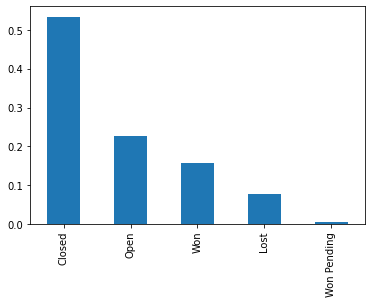

In [103]:
df['Revenue*Line*Status'].value_counts(normalize=True).plot.bar()

(array([2111.,    0.,  621.,    0.,    0.,  303.,    0.,  901.,    0.,
          19.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

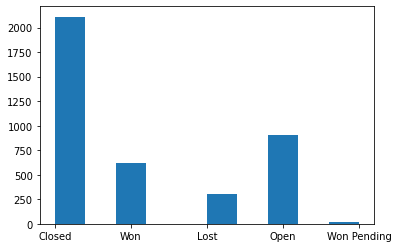

In [18]:
plt.hist(df['Revenue*Line*Status'])

FORECAST_TYPE_GROUP:

In [107]:
df['Forecast*Type*Group'].value_counts(normalize=True)


Pipeline    0.537547
Upside      0.214412
Won         0.164855
Forecast    0.083186
Name: Forecast*Type*Group, dtype: float64

In [108]:
df['Reason*Won*Lost'].value_counts()

Closed - No Business Opportunity                       1050
Unassigned                                              948
Closed - Customer Not Ready or No Funding               599
Won - Primary reason was Oracle Relationship            295
Won - Primary reason was Oracle Product Features        212
Closed - Duplicate Opportunity                          143
Closed - Alternative Oracle Product                     131
Won - Primary reason was Oracle Pricing                  93
Lost - No Adoption                                       71
Lost - Competitor - Pricing & Policies                   71
Closed - Sales Rep Reject                                56
Closed - Operations Use Only                             54
Closed - Customer Acquired                               31
Lost - Alternative Oracle Solution - Other Cloud         30
Lost - Competitor - Product Feature / Functionality      28
Closed - System Termination                              22
Lost - Competitor - Relationship        

# Analisis Descriptivo

## Medidas de disperción

In [155]:
df.std(axis=0, numeric_only=True)

revenue*-/Line Id           2.899852e+06
Pipeline*K                  1.505585e+02
Revenue*Line*Probability    3.116981e+01
Best*Case**Pipeline*K       1.151392e+08
Worst*Case**Pipeline*K      8.413456e+01
dtype: float64

In [167]:
df.mean(axis=0, numeric_only=True)

revenue*-/Line Id           4.987965e+06
Pipeline*K                  5.822404e+01
Revenue*Line*Probability    4.025790e+01
Best*Case**Pipeline*K       1.844211e+06
Worst*Case**Pipeline*K      8.532441e+00
dtype: float64

In [168]:
df.median(axis=0, numeric_only=True)

revenue*-/Line Id           4944165.0
Pipeline*K                       20.0
Revenue*Line*Probability         30.0
Best*Case**Pipeline*K            25.0
Worst*Case**Pipeline*K            0.0
dtype: float64

In [169]:
df.mode(axis=0)

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,2909749,1A3D2C32,HW/SW,No fill,LAD_JULIACAS,Mary Harvey,CUSTOMER-UFSLJO,BR,Unspecified,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OAL-SALES_WW@ORACLE.COM,10,0.0,0.0,No fill,NE


# Agrupar

In [109]:
df.groupby('Revenue*Line*Status')['opportunity*--status'].value_counts()

Revenue*Line*Status  opportunity*--status
Closed               Closed                  2108
                     Open                       3
Lost                 Lost                     297
                     Won                        4
                     Closed                     1
                     Won Pending                1
Open                 Open                     900
                     Won                        1
Won                  Won                      600
                     Open                      14
                     Won Pending                7
Won Pending          Won Pending               19
Name: opportunity*--status, dtype: int64

In [153]:
won = (df['Revenue*Line*Status'] == 'Won')
len(won)

3955

In [154]:
df_won = df[won]
df_won.shape


(621, 32)

In [155]:
df_won.mean(axis=0, numeric_only=True)

revenue*-/Line Id           4.982225e+06
Pipeline*K                  4.599709e+01
Revenue*Line*Probability    9.964573e+01
Best*Case**Pipeline*K       4.599709e+01
Worst*Case**Pipeline*K      4.599870e+01
dtype: float64

<AxesSubplot:>

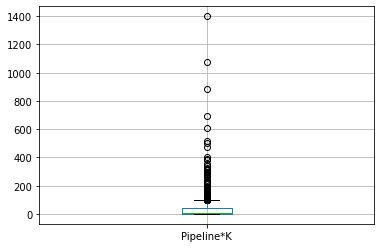

In [156]:
df_won.boxplot(column=['Pipeline*K'])

In [157]:
stable= df['Revenue*Line*Status'] != 'Open'

In [158]:
df_stable=df[stable]

In [24]:
df_stable.mean(axis=0, numeric_only=True)

revenue*-/Line Id           4.980693e+06
Pipeline*K                  5.623113e+01
Revenue*Line*Probability    4.238376e+01
Best*Case**Pipeline*K       2.380617e+06
Worst*Case**Pipeline*K      9.561514e+00
dtype: float64

In [25]:
df_stable.std(axis=0, numeric_only=True)

revenue*-/Line Id           2.906661e+06
Pipeline*K                  1.375826e+02
Revenue*Line*Probability    3.352061e+01
Best*Case**Pipeline*K       1.310270e+08
Worst*Case**Pipeline*K      5.361201e+01
dtype: float64

In [55]:
prueba_won = df_won['Best*Case**Pipeline*K']-df_won['Pipeline*K']

In [56]:
prueba_won.shape

(621,)

## Correlacion

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

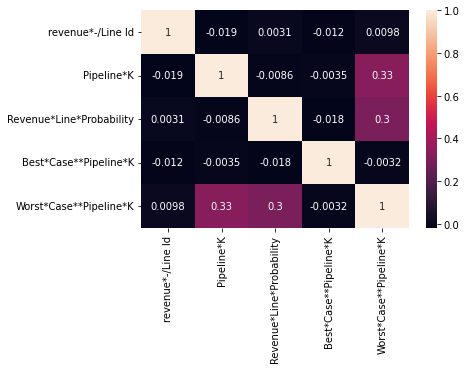

In [70]:
corr_df = df_stable.corr(method='pearson', min_periods=1)
sns.heatmap(corr_df, annot = True)
plt.show()

In [67]:
corre_won = df_won.corr(method='pearson', min_periods=1)

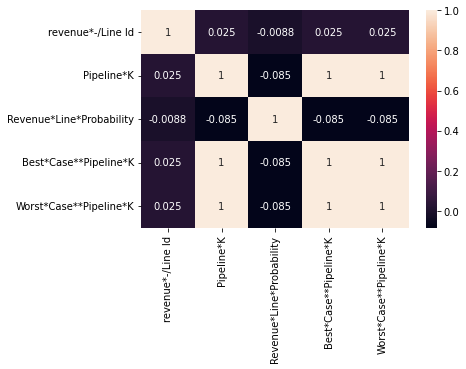

In [68]:
sns.heatmap(corre_won, annot = True)
plt.show()

<AxesSubplot:>

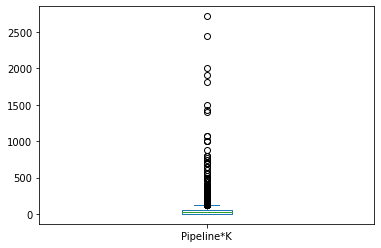

In [38]:
df_stable['Pipeline*K'].plot.box()

In [30]:
df_stable_date=df_stable.sort_values(by='Revenue*Line*Creation*Date')

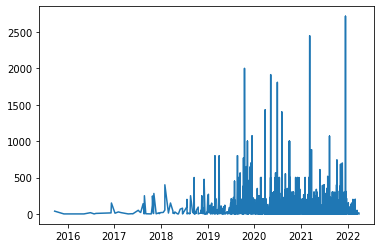

In [33]:
plt.plot(df_stable_date['Revenue*Line*Creation*Date'], df_stable_date['Pipeline*K'])

<AxesSubplot:>

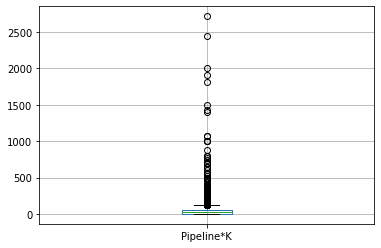

In [26]:
df_stable.boxplot(column=['Pipeline*K'])

In [110]:
df.groupby('opportunity*--status')['Revenue*Line*Status'].value_counts().to_frame()

Revenue*Line*Status
opportunity*--status Revenue*Line*Status                     
Closed               Closed                              2108
                     Lost                                   1
Lost                 Lost                                 297
Open                 Open                                 900
                     Won                                   14
                     Closed                                 3
Won                  Won                                  600
                     Lost                                   4
                     Open                                   1
Won Pending          Won Pending                           19
                     Won                                    7
                     Lost                                   1

In [111]:
df.groupby('Revenue*Line*Status')['Opty*Forecast*Type'].value_counts().to_frame()

Opty*Forecast*Type
Revenue*Line*Status Opty*Forecast*Type                    
Closed              PIPELINE_10                        805
                    PIPELINE_30                        398
                    UPSIDE_40                          323
                    PIPELINE_20                        298
                    UPSIDE_50                          158
                    FORECAST_60                         87
                    FORECAST_70                         16
                    FORECAST_80                         11
                    FORECAST_90                          8
                    WON_100                              7
Lost                PIPELINE_10                         93
                    UPSIDE_40                           68
                    PIPELINE_30                         43
                    FORECAST_60                         33
                    UPSIDE_50                           28
                    PIPELINE_20                         21
                    FORECAST_70                          9
                    WON_100                              5
                    FORECAST_90                          2
                    FORECAST_80                          1
Open                PIPELINE_10                        267
                    UPSIDE_40                          196
                    FORECAST_60                        132
                    PIPELINE_30                        121
                    PIPELINE_20                         80
                    UPSIDE_50                           74
                    FORECAST_70                         13
                    FORECAST_80                          9
                    WON_100                              5
                    FORECAST_90                          4
Won                 WON_100                            616
                    FORECAST_60                          2
                    FORECAST_80                          1
                    FORECAST_90                          1
                    UPSIDE_40                            1
Won Pending         WON_100                             19

## Outliers

<AxesSubplot:>

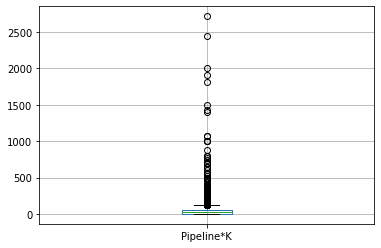

In [71]:
df_stable.boxplot(column=columnas_numericas[0])

In [149]:
df['Best*Case**Pipeline*K'].value_counts().sort_index()



0.000000e+00    279
2.677082e-07      1
1.361007e-06      1
1.000000e-04      1
1.880972e-04      2
               ... 
2.500050e+06      1
7.000090e+06      1
1.800010e+07      1
2.000001e+07      1
7.240927e+09      1
Name: Best*Case**Pipeline*K, Length: 1347, dtype: int64

<AxesSubplot:>

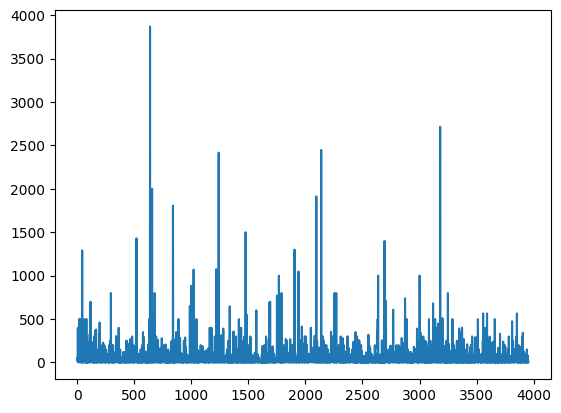

In [164]:
df['Pipeline*K'].plot.line()

## Ventas

In [159]:
df_sales = df_won.sort_values(by='Revenue*Line*Creation*Date')
df_sales = df_sales.groupby('Revenue*Line*Creation*Date')['Pipeline*K'].sum()

In [160]:
df_sales

Revenue*Line*Creation*Date
2016-06-28     16.936
2017-05-23      3.250
2017-05-25      0.794
2017-10-25    118.075
2017-12-18      3.521
               ...   
2022-03-14      1.000
2022-03-15     17.385
2022-03-16      3.000
2022-03-18      0.113
2022-03-22     10.773
Name: Pipeline*K, Length: 389, dtype: float64

In [138]:
df_sales.loc['2000-01-01':'2020-01-01'].mode()

0    0.0
Name: sales, dtype: float64

<AxesSubplot:xlabel='Revenue*Line*Creation*Date'>

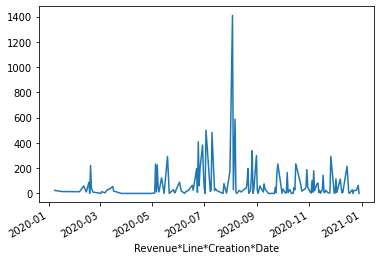

In [135]:
df_sales.loc['2020-01-01':'2021-01-01'].mode()

<AxesSubplot:xlabel='Revenue*Line*Creation*Date'>

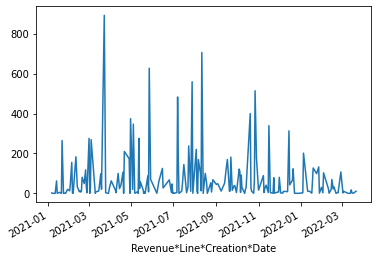

In [137]:
df_sales['2021-01-01':'2023-01-01'].plot()

<AxesSubplot:>

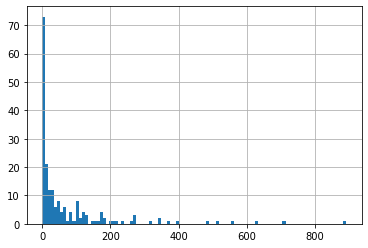

In [161]:
df_sales.loc['2021-01-01':'2023-01-01'].hist(bins=100)

In [101]:
df_sales.head()

Revenue*Line*Creation*Date
2016-06-28     16.935994
2017-05-23      3.250049
2017-05-25      0.794216
2017-10-25    118.074898
2017-12-18      3.521180
Name: sales, dtype: float64

In [87]:
df_sales.tail()

Revenue*Line*Creation*Date
2022-03-14     1.000000
2022-03-15    17.385000
2022-03-16     3.000000
2022-03-18     0.112858
2022-03-22    10.773000
Name: sales, dtype: float64

In [162]:
df_sales.value_counts().sort_index()

0.000       29
0.001        5
0.009        1
0.047        1
0.075        1
            ..
627.120      1
706.079      1
891.913      1
1074.567     1
1409.668     1
Name: Pipeline*K, Length: 334, dtype: int64

<AxesSubplot:xlabel='Revenue*Line*Creation*Date'>

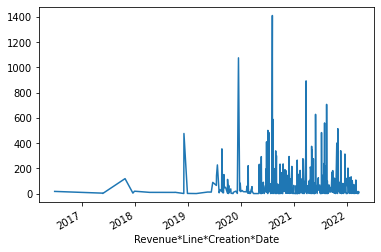

In [165]:
df_sales.plot()

<AxesSubplot:>

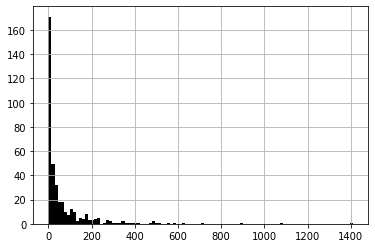

In [164]:
df_sales.hist(color="black", bins=100)

C:\Users\Laura\AppData\Local\Temp\ipykernel_1572\4147100072.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


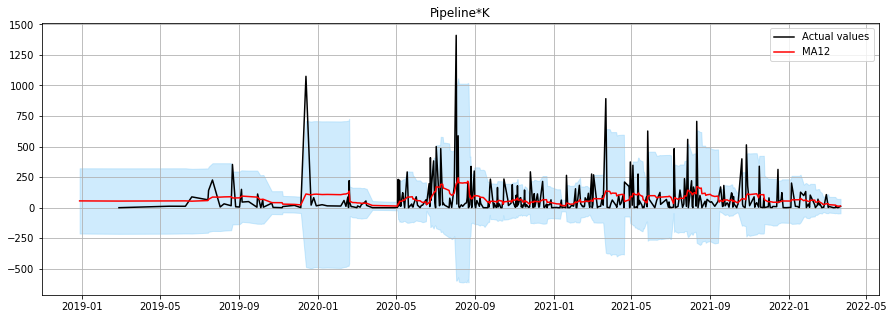

In [176]:
plot_ts(df_sales, window=12)

C:\Users\Laura\AppData\Local\Temp\ipykernel_1572\4147100072.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


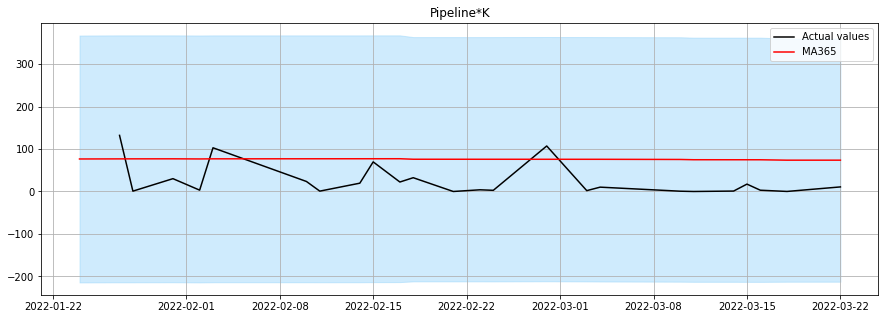

In [177]:
plot_ts(df_sales, window=365)

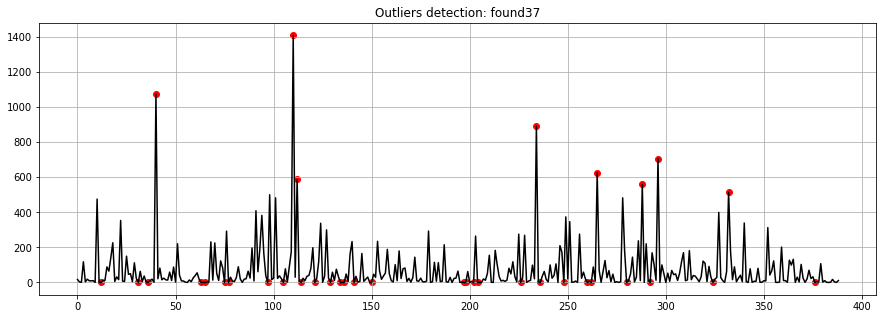

In [181]:
df_sales_outliers = find_outliers(df_sales, perc=0.05)

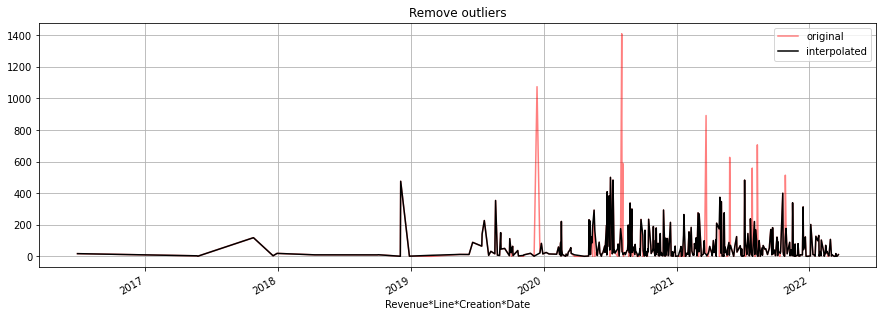

In [188]:
## outliers index position
outliers_index_pos = df_sales_outliers[df_sales_outliers["outlier"]==1].index
## exclude outliers
df_sales_clean = remove_outliers(df_sales, outliers_idx=outliers_index_pos)

<AxesSubplot:xlabel='Revenue*Line*Creation*Date'>

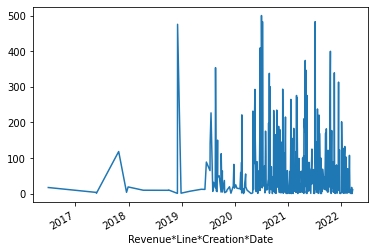

In [190]:
df_sales_clean.plot()

# Curiosidades

## Celdas vacias

In [ ]:
no_name = df['organization   name'] == 'No fill'
df_organization_no_name = df[no_name]
print(f'El total de registros que no cuentan con nombre de la empresa son {df_organization_no_name.shape}')
df_organization_no_name.head()
df_organization_no_name['Opportunity*Owner*Email'].value_counts()
df['Opportunity*Owner*Email'].value_counts()
no_dealq = df['Deal*Qualification'] == 'No fill'
df_no_dealq= df[no_dealq]
print(f'El total de registros que no cuentan con la calificacion de la propuesta son {df_no_dealq.shape}')
df_no_dealq.head()
df_no_dealq['Opportunity*Owner*Email'].value_counts()